# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime as dtime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
def citi_list():
# Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count

while len(cities) < 500:
    citi_list()
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_list = []

def city_weather(clist):
    url = "http://api.openweathermap.org/data/2.5/weather?q="
    count = 0
    print('Beginning Data Retrieval')
    print('-----------------------------------------')
    for city in clist:
        count += 1
        r = requests.get(f"{url}{city}&units=imperial&APPID={api_key}")
        if r.status_code == 200:
            r = r.json()
            print(f"Getting records for {count}:{city}")
            weather_list.append(r)            
        else:
            print(f'{count}:{city} -- No weather data available for city, skipping')
            pass

city_weather(cities)

Beginning Data Retrieval
-----------------------------------------
Getting records for 1:hamilton
Getting records for 2:hithadhoo
Getting records for 3:hilo
Getting records for 4:upernavik
Getting records for 5:saint-philippe
Getting records for 6:coahuayana
7:barentsburg -- No weather data available for city, skipping
Getting records for 8:clyde river
Getting records for 9:new norfolk
10:illoqqortoormiut -- No weather data available for city, skipping
Getting records for 11:dikson
Getting records for 12:karratha
Getting records for 13:rikitea
Getting records for 14:pacific grove
Getting records for 15:sechura
Getting records for 16:kaitangata
Getting records for 17:dhidhdhoo
Getting records for 18:tiznit
Getting records for 19:chupa
Getting records for 20:paraiso
Getting records for 21:hobart
22:kamenskoye -- No weather data available for city, skipping
Getting records for 23:ushuaia
Getting records for 24:cidreira
Getting records for 25:klaksvik
Getting records for 26:buraydah
Gettin

In [6]:
raw_df = pd.DataFrame(weather_list)
raw_df.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,rain,snow
0,"{'lon': -79.87, 'lat': 43.26}","[{'id': 600, 'main': 'Snow', 'description': 'l...",stations,"{'temp': 30.87, 'feels_like': 20.7, 'temp_min'...",2012.0,"{'speed': 11.41, 'deg': 180, 'gust': 19.46}",{'all': 90},1578281925,"{'type': 1, 'id': 818, 'country': 'CA', 'sunri...",-18000,5969785,Hamilton,200,NaN,NaN
1,"{'lon': 73.08, 'lat': -0.6}","[{'id': 804, 'main': 'Clouds', 'description': ...",model,"{'temp': 84.33, 'feels_like': 87.33, 'temp_min...",NaN,"{'speed': 12.73, 'deg': 62}",{'all': 100},1578281926,"{'country': 'MV', 'sunrise': 1578272902, 'suns...",18000,1282256,Hithadhoo,200,NaN,NaN
2,"{'lon': -155.08, 'lat': 19.71}","[{'id': 501, 'main': 'Rain', 'description': 'm...",stations,"{'temp': 64.42, 'feels_like': 65.48, 'temp_min...",8047.0,"{'speed': 3.36, 'deg': 240}",{'all': 90},1578281652,"{'type': 1, 'id': 7881, 'country': 'US', 'sunr...",-36000,5855927,Hilo,200,{'1h': 3.05},NaN
3,"{'lon': -56.15, 'lat': 72.79}","[{'id': 804, 'main': 'Clouds', 'description': ...",model,"{'temp': -30.44, 'feels_like': -46.25, 'temp_m...",NaN,"{'speed': 15.59, 'deg': 358}",{'all': 94},1578281926,"{'country': 'GL', 'sunrise': 0, 'sunset': 0}",-10800,3418910,Upernavik,200,NaN,NaN
4,"{'lon': -73.48, 'lat': 45.36}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 13.95, 'feels_like': 5.97, 'temp_min'...",14484.0,"{'speed': 3.36, 'deg': 340}",{'all': 1},1578281881,"{'type': 1, 'id': 820, 'country': 'CA', 'sunri...",-18000,6138908,Saint-Philippe,200,NaN,NaN


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
raw_df.to_csv(output_data_file)
raw_df.shape

(548, 15)

In [80]:
co_codes = []
for cord_pair in raw_df['coord']:
    city = citipy.nearest_city(cord_pair['lat'], cord_pair['lon'])
    co_codes.append(city.country_code)

In [81]:
df_main = pd.DataFrame(raw_df['name'])
df_main['Country'] = co_codes

def df_builder(var, sub_var):
    var_list = []
    for idx, ele in enumerate(raw_df[var]):
        var_list.append(raw_df[var][idx][sub_var])
    df_main[f'{sub_var}'.capitalize()] = var_list
df_builder('coord','lat')
df_builder('coord','lon')
df_builder('main','temp_max')
df_builder('main','humidity')
df_builder('wind','speed')
df_builder('clouds','all')
df_builder('main','temp_max')
df_main['Time'] = raw_df['dt']
df_main = df_main.rename(columns = {'name':'City','All': 'Cloudiness', 'Speed':'Wind Speed', 'Temp_max':'Max Temp'})


In [82]:
df_main

,City,Country,Lat,Lon,Max Temp,Humidity,Wind Speed,Cloudiness,Time
0,Hamilton,ca,43.26,-79.87,33.01,100,11.41,90,1578281925
1,Hithadhoo,mv,-0.60,73.08,84.33,73,12.73,100,1578281926
2,Hilo,us,19.71,-155.08,71.60,83,3.36,90,1578281652
3,Upernavik,gl,72.79,-56.15,-30.44,96,15.59,94,1578281926
4,Saint-Philippe,ca,45.36,-73.48,19.99,66,3.36,1,1578281881
...,...,...,...,...,...,...,...,...,...
543,Kampot,kh,10.62,104.18,84.20,54,1.12,44,1578282043
544,Wad Rawah,sd,15.16,33.13,55.17,24,10.25,0,1578282043
545,Lewisporte,ca,49.25,-55.06,27.00,92,18.34,90,1578282043
546,Balbalan,ph,17.44,121.20,71.55,60,4.94,11,1578282044


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [105]:
def ploter(x_var,y_var, y_label):
    plt_date = dtime.today().strftime('%m/%d/%Y')
    x = df_main[x_var]
    y = df_main[y_var]
    plt.title(f'City Latitude vs. {y_var} ({plt_date})')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid()
    plt.scatter(x,y, c = 'darkcyan',alpha = 0.65,
                edgecolors = 'black')
    plt.savefig(f'output_data/{y_var}.png')

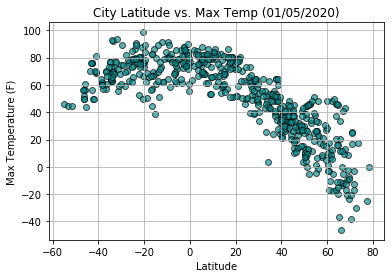

In [106]:
plot1 = ploter('Lat', 'Max Temp', "Max Temperature (F)")

#### Latitude vs. Humidity Plot

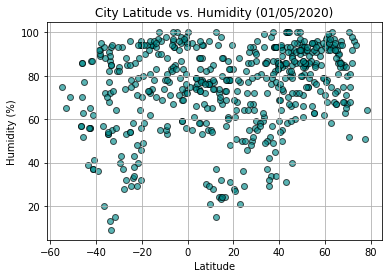

In [107]:
plot2 = ploter('Lat', 'Humidity', "Humidity (%)")

#### Latitude vs. Cloudiness Plot

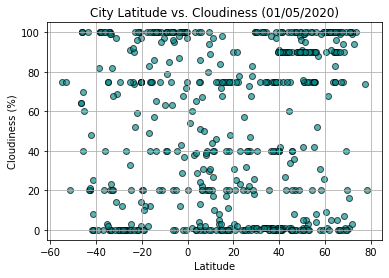

In [108]:
plot3 = ploter('Lat', 'Cloudiness', "Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

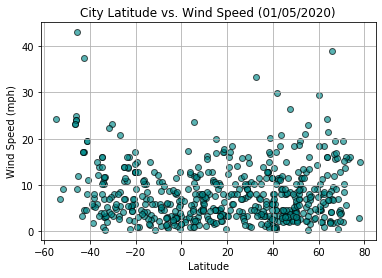

In [109]:
plot4 = ploter('Lat', 'Wind Speed', 'Wind Speed (mph)')

# OBSERVATIONS 

#### 1. From the Latitude vs. Max Temperature plot we can see how the points reach a peak before 0 degrees latitude and then start to decrease. This is to be expected as all the cities below the equator are experiencing summer seasons while cities above the equator are experiencing winter seasons. 

#### 2. The second plot comparing latitude to humidity shows that there isn't a strong relationship between the two variables. There is a higher concentration of cities with high levels of humidity as latitude increases. This could be a result of different seasons as the cities south of the equator are experiencing summer seasons which could be drier than others. 

#### 3. Based on the third plot comparing latitude to cloudiness shows that there is no visible relationship between them. Regardless of the location of the city, cloudiness seems to be independent of its latitude. 

#### 4. The final plot comparing latitude and wind speed fails to reveal any relationship between the two variables.  At the extremes of the X axis (north and south poles) we can see there is a greater variation in wind speeds while cities between -40 and 60 degrees latitude seem to have a smaller level of variation and are more evenly distributed. 